# Optimization Using Gradient Descent in One Variable

To understand how to optimize functions using gradient descent, start from simple examples - functions of one variable. In this lab, you will implement the gradient descent method for functions with single and multiple minima, experiment with the parameters and visualize the results. This will allow you to understand the advantages and disadvantages of the gradient descent method.

## Packages

Run the following cell to load the packages you'll need.

Following code is only for defining different function which will be usefull for running the iteration below. You can convert it into .py code and import the same if you want to use it for teaching to others. For the sake of workshop i have reduced libary buildup and defined code in single flow



In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
from matplotlib.patches import FancyArrowPatch
from matplotlib.gridspec import GridSpec
from IPython.display import display, clear_output


def plot_f(x_range, y_range, f, ox_position):
    x = np.linspace(*x_range, 100)
    fig, ax = plt.subplots(1,1,figsize=(8,4))

    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False

    ax.set_ylim(*y_range)
    ax.set_xlim(*x_range)
    ax.set_ylabel('$f$')
    ax.set_xlabel('$x$')
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position(('data', ox_position))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.autoscale(enable=False)

    pf = ax.plot(x, f(x), 'k')

    return fig, ax


class gradient_descent_one_variable:
    """ class to run one interactive plot """
    def __init__(self, x_range, y_range, f, dfdx, gd, n_it, lr, x_0, ox_position, t_position):
        x = np.linspace(*x_range, 100)
        fig, ax = plot_f(x_range, y_range, f, ox_position)

        # Initialize plot.
        self.fig = fig
        self.ax = ax
        self.x = x
        self.f = f
        self.dfdx = dfdx
        self.gd = gd
        self.n_it = n_it
        self.lr = lr
        self.x_0 = x_0
        self.x_range = x_range
        self.i = 0
        self.ox_position = ox_position
        self.t_position = t_position

        self.update_plot_point(firsttime=True)
        self.path = path(self.x_0, self.ax, self.ox_position)  # initialize an empty path, avoids existance check

        time.sleep(0.2)
        clear_output(wait=True)
        display(self.fig)

        self.run_gd()
        self.cpoint = self.fig.canvas.mpl_connect('button_press_event', self.click_plot)

    def click_plot(self, event):
        ''' Called when click in plot '''
        if (event.xdata <= max(self.x) and event.xdata >= min(self.x)):
            self.x_0 = event.xdata
            self.i = 0
            self.path.re_init(self.x_0)
            self.update_plot_point()
            time.sleep(0.2)
            self.run_gd()

    def update_plot_point(self, firsttime=False):

        # Remove items and re-add them on plot.
        if not firsttime:
            for artist in self.p_items:
                artist.remove()

        a = self.ax.scatter(self.x_0, self.f(self.x_0), marker='o', s=100, color='r', zorder=10)
        b = self.ax.scatter(self.x_0, self.ox_position, marker='o', s=100, color='k', zorder=10)
        c = self.ax.hlines(self.f(self.x_0), 0, self.x_0, lw=2, ls='dotted', color='k')
        d = self.ax.vlines(self.x_0, self.ox_position, self.f(self.x_0), lw=2, ls='dotted', color='k')
        t_it = self.ax.annotate(f"Iteration #${self.i}$", xy=(self.t_position[0], self.t_position[1]),
                                xytext=(4,4), textcoords='offset points', size=10)
        t_x_0 = self.ax.annotate(f"$x_0 = {self.x_0:0.4f}$", xy=(self.t_position[0], self.t_position[1]-1),
                                 xytext=(4,4), textcoords='offset points', size=10)
        t_f = self.ax.annotate(f"$f\\,\\left(x_0\\right) = {self.f(self.x_0):0.2f}$",
                               xy=(self.t_position[0], self.t_position[1]-2), xytext=(4,4),
                              textcoords='offset points', size=10)
        t_dfdx = self.ax.annotate(f"$f\\,'\\left(x_0\\right) = {self.dfdx(self.x_0):0.4f}$",
                                  xy=(self.t_position[0], self.t_position[1]-3),
                                  xytext=(4,4), textcoords='offset points', size=10)

        self.p_items = [a, b, c, d, t_it, t_x_0, t_f, t_dfdx]
        self.fig.canvas.draw()

    def run_gd(self):
        self.i = 1
        x_0_new = self.gd(self.dfdx, self.x_0, self.lr, 1)
        while (self.i <= self.n_it and abs(self.dfdx(x_0_new)) >= 0.00001 and x_0_new >= self.x_range[0]):
            x_0_new = self.gd(self.dfdx, self.x_0, self.lr, 1)
            self.path.add_path_item(x_0_new, self.f)
            self.x_0 = x_0_new
            time.sleep(0.05)
            self.update_plot_point()
            clear_output(wait=True)
            display(self.fig)
            self.i += 1

        if abs(self.dfdx(self.x_0)) >= 0.00001 or self.x_0 < self.x_range[0] or self.x_0 < self.x_range[0]:
            t_res = self.ax.annotate("Has Not Converged", xy=(self.t_position[0], self.t_position[1]-4),
                             xytext=(4,4), textcoords='offset points', size=10)
        else:
            t_res = self.ax.annotate("Converged", xy=(self.t_position[0], self.t_position[1]-4),
                             xytext=(4,4), textcoords='offset points', size=10)
        t_instruction = self.ax.text(0.3,0.95,"[Click on the plot to choose initial point]",
                                     size=10, color="r", transform=self.ax.transAxes)
        self.p_items.append(t_res)
        self.p_items.append(t_instruction)
        # Clear last time at the end, so there is no duplicate with the cell output.
        clear_output(wait=True)
#         plt.close()


class path:
    ''' tracks paths during gradient descent on the plot '''
    def __init__(self, x_0, ax, ox_position):
        ''' x_0 at start of path '''
        self.path_items = []
        self.x_0 = x_0
        self.ax = ax
        self.ox_position = ox_position

    def re_init(self, x_0):
        for artist in self.path_items:
            artist.remove()
        self.path_items = []
        self.x_0 = x_0

    def add_path_item(self, x_0, f):
        a = FancyArrowPatch(
            posA=(self.x_0, self.ox_position), posB=(x_0, self.ox_position), color='r',
            arrowstyle='simple, head_width=5, head_length=10, tail_width=1.0',
        )
        b = self.ax.scatter(self.x_0, f(self.x_0), facecolors='none', edgecolors='r', ls='dotted', s=100, zorder=10)
        self.ax.add_artist(a)
        self.path_items.append(a)
        self.path_items.append(b)
        self.x_0 = x_0


# +
def f_example_2(x):
    return (np.exp(x) - np.log(x))*np.sin(np.pi*x*2)

def dfdx_example_2(x):
    return (np.exp(x) - 1/x)*np.sin(np.pi*x*2) + (np.exp(x) - \
              np.log(x))*np.cos(np.pi*x*2)*2*np.pi


# +
def f_example_3(x,y):
    return (85+ 0.1*(- 1/9*(x-6)*x**2*y**3 + 2/3*(x-6)*x**2*y**2))

def dfdx_example_3(x,y):
    return 0.1/3*x*y**2*(2-y/3)*(3*x-12)

def dfdy_example_3(x,y):
    return 0.1/3*(x-6)*x**2*y*(4-y)


# +
def f_example_4(x,y):
    return -(10/(3+3*(x-.5)**2+3*(y-.5)**2) + \
            2/(1+2*((x-3)**2)+2*(y-1.5)**2) + \
            3/(1+.5*((x-3.5)**2)+0.5*(y-4)**2))+10

def dfdx_example_4(x,y):
    return  -(-2*3*(x-0.5)*10/(3+3*(x-0.5)**2+3*(y-0.5)**2)**2 + \
            -2*2*(x-3)*2/(1+2*((x-3)**2)+2*(y-1.5)**2)**2 +\
            -2*0.5*(x-3.5)*3/(1+.5*((x-3.5)**2)+0.5*(y-4)**2)**2)

def dfdy_example_4(x,y):
    return -(-2*3*(y-0.5)*10/(3+3*(x-0.5)**2+3*(y-0.5)**2)**2 + \
            -2*2*(y-1.5)*2/(1+2*((x-3)**2)+2*(y-1.5)**2)**2 +\
            -0.5*2*(y-4)*3/(1+.5*((x-3.5)**2)+0.5*(y-4)**2)**2)


# -

def plot_f_cont_and_surf(x_range, y_range, z_range, f, cmap, view):

    fig = plt.figure( figsize=(10,5))
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
    fig.set_facecolor('#ffffff') #white
    gs = GridSpec(1, 2, figure=fig)
    axc = fig.add_subplot(gs[0, 0])
    axs = fig.add_subplot(gs[0, 1],  projection='3d')

    x = np.linspace(*x_range, 51)
    y = np.linspace(*y_range, 51)
    X,Y = np.meshgrid(x,y)

    cont = axc.contour(X, Y, f(X, Y), cmap=cmap, levels=18, linewidths=2, alpha=0.7)
    axc.set_xlabel('$x$')
    axc.set_ylabel('$y$')
    axc.set_xlim(*x_range)
    axc.set_ylim(*y_range)
    axc.set_aspect("equal")
    axc.autoscale(enable=False)

    surf = axs.plot_surface(X,Y, f(X,Y), cmap=cmap,
                    antialiased=True, cstride=1, rstride=1, alpha=0.69)
    axs.set_xlabel('$x$')
    axs.set_ylabel('$y$')
    axs.set_zlabel('$f$')
    axs.set_xlim(*x_range)
    axs.set_ylim(*y_range)
    axs.set_zlim(*z_range)
    axs.view_init(elev=view['elev'], azim=view['azim'])
    axs.autoscale(enable=False)

    return fig, axc, axs


class gradient_descent_two_variables:
    """ class to run one interactive plot """
    def __init__(self, x_range, y_range, z_range, f, dfdx, dfdy, gd, n_it, lr, x_0, y_0,
                 t_position, t_space, instr_position, cmap, view):

        x = np.linspace(*x_range, 51)
        y = np.linspace(*y_range, 51)
        fig, axc, axs = plot_f_cont_and_surf(x_range, y_range, z_range, f, cmap, view)

        # Initialize plot.
        self.fig = fig
        self.axc = axc
        self.axs = axs
        self.x = x
        self.y = y
        self.f = f
        self.dfdx = dfdx
        self.dfdy = dfdy
        self.gd = gd
        self.n_it = n_it
        self.lr = lr
        self.x_0 = x_0
        self.y_0 = y_0
        self.x_range = x_range
        self.y_range = y_range
        self.i = 0
        self.t_position = t_position
        self.t_space = t_space
        self.instr_position = instr_position

        self.update_plot_point(firsttime=True)
        self.path = path_2(self.x_0, self.y_0, self.axc, self.axs)  # initialize an empty path, avoids existance check

        time.sleep(0.2)
        clear_output(wait=True)
        display(self.fig)

        self.run_gd()
        self.cpoint = self.fig.canvas.mpl_connect('button_press_event', self.click_plot)

    def click_plot(self, event):
        ''' Called when click in plot '''
        if (event.xdata <= max(self.x) and event.xdata >= min(self.x) and
            event.ydata <= max(self.y) and event.ydata >= min(self.y)):
            self.x_0 = event.xdata
            self.y_0 = event.ydata
            self.i = 0
            self.path.re_init(self.x_0, self.y_0)
            self.update_plot_point()
            time.sleep(0.2)
            self.run_gd()

    def update_plot_point(self, firsttime=False):

        # Remove items and re-add them on plot.
        if not firsttime:
            for artist in self.p_items:
                artist.remove()

        a = self.axc.scatter(self.x_0, self.y_0, marker='o', s=100, color='k', zorder=10)
        b = self.axc.hlines(self.y_0, self.axc.get_xlim()[0], self.x_0, lw=2, ls='dotted', color='k')
        c = self.axc.vlines(self.x_0, self.axc.get_ylim()[0], self.y_0, lw=2, ls='dotted', color='k')
        d = self.axs.scatter3D(self.x_0, self.y_0, self.f(self.x_0, self.y_0), s=100, color='r', zorder=10)
        t_it = self.axs.text(self.t_position[0], self.t_position[1], self.t_position[2],
                             f"Iteration #${self.i}$", size=10, zorder=20)
        t_x_y = self.axs.text(self.t_position[0], self.t_position[1], self.t_position[2]-self.t_space,
                             f"$x_0, y_0 = {self.x_0:0.2f}, {self.y_0:0.2f}$", size=10, zorder=20)
        t_f = self.axs.text(self.t_position[0], self.t_position[1], self.t_position[2]-self.t_space*2,
                             f"$f\\,\\left(x_0, y_0\\right) = {self.f(self.x_0, self.y_0):0.2f}$", size=10, zorder=20)
        t_dfdx = self.axs.text(self.t_position[0], self.t_position[1], self.t_position[2]-self.t_space*3,
                             f"$f\\,'_x\\left(x_0, y_0\\right) = {self.dfdx(self.x_0, self.y_0):0.2f}$", size=10, zorder=20)
        t_dfdy = self.axs.text(self.t_position[0], self.t_position[1], self.t_position[2]-self.t_space*4,
                             f"$f\\,'_y\\left(x_0, y_0\\right) = {self.dfdy(self.x_0, self.y_0):0.2f}$", size=10, zorder=20)
        self.p_items = [a, b, c, d, t_it, t_x_y, t_f, t_dfdx, t_dfdy]
        self.fig.canvas.draw()

    def run_gd(self):
        self.i = 1
        x_0_new, y_0_new = self.gd(self.dfdx, self.dfdy, self.x_0, self.y_0, self.lr, 1)

        while (self.i <= self.n_it and
               (abs(self.dfdx(x_0_new, y_0_new)) >= 0.001 or abs(self.dfdy(x_0_new, y_0_new)) >= 0.001) and
               x_0_new >= self.x_range[0] and x_0_new <= self.x_range[1] and
               y_0_new >= self.y_range[0] and y_0_new <= self.y_range[1]):
            x_0_new, y_0_new = self.gd(self.dfdx, self.dfdy, self.x_0, self.y_0, self.lr, 1)
            self.path.add_path_item(x_0_new, y_0_new, self.f)
            self.x_0 = x_0_new
            self.y_0 = y_0_new
            time.sleep(0.05)
            self.update_plot_point()
            clear_output(wait=True)
            display(self.fig)
            self.i += 1

        if abs(self.dfdx(x_0_new, y_0_new)) >= 0.001 or abs(self.dfdy(x_0_new, y_0_new)) >= 0.001 or self.x_0 < self.x_range[0] or self.x_0 > self.x_range[1] or self.y_0 < self.y_range[0] or self.y_0 > self.y_range[1]:
            t_res = self.axs.text(self.t_position[0], self.t_position[1], self.t_position[2]-self.t_space*5,
                                  "Has Not Converged", size=10, zorder=20)
        else:
            t_res = self.axs.text(self.t_position[0], self.t_position[1], self.t_position[2]-self.t_space*5,
                                  "Converged", size=10, zorder=20)
        t_instruction = self.axs.text(*self.instr_position, "[Click on the contour plot to choose initial point]",
                                     size=10, color="r", transform=self.axs.transAxes)
        self.p_items.append(t_res)
        self.p_items.append(t_instruction)
        # Clear last time at the end, so there is no duplicate with the cell output.
        clear_output(wait=True)


class path_2:
    ''' tracks paths during gradient descent on contour and surface plots '''
    def __init__(self, x_0, y_0, axc, axs):
        ''' x_0, y_0 at start of path '''
        self.path_items = []
        self.x_0 = x_0
        self.y_0 = y_0
        self.axc = axc
        self.axs = axs

    def re_init(self, x_0, y_0):
        for artist in self.path_items:
            artist.remove()
        self.path_items = []
        self.x_0 = x_0
        self.y_0 = y_0

    def add_path_item(self, x_0, y_0, f):
        a = FancyArrowPatch(
            posA=(self.x_0, self.y_0), posB=(x_0, y_0), color='r',
            arrowstyle='simple, head_width=5, head_length=10, tail_width=1.0',
        )
        b = self.axs.scatter3D(self.x_0, self.y_0, f(self.x_0, self.y_0),
                               facecolors='none', edgecolors='r', ls='dotted', s=100, zorder=10)
        self.axc.add_artist(a)
        self.path_items.append(a)
        self.path_items.append(b)
        self.x_0 = x_0
        self.y_0 = y_0

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
from matplotlib.patches import FancyArrowPatch
from matplotlib.gridspec import GridSpec
from IPython.display import display, clear_output
# Magic command to make matplotlib plots interactive.
# %matplotlib widget

<a name='1'></a>
## 1 - Function with One Global Minimum

Function $f\left(x\right)=e^x - \log(x)$ (defined for $x>0$) is a function of one variable which has only one **minimum point** (called **global minimum**). However, sometimes that minimum point cannot be found analytically - solving the equation $\frac{df}{dx}=0$. It can be done using a gradient descent method.

To implement gradient descent, you need to start from some initial point $x_0$. Aiming to find a point, where the derivative equals zero, you want to move "down the hill". Calculate the derivative $\frac{df}{dx}(x_0)$ (called a **gradient**) and step to the next point using the expression:

$$x_1 = x_0 - \alpha \frac{df}{dx}(x_0),\tag{1}$$

where $\alpha>0$ is a parameter called a **learning rate**. Repeat the process iteratively. The number of iterations $n$ is usually also a parameter.

Subtracting $\frac{df}{dx}(x_0)$ you move "down the hill" against the increase of the function - toward the minimum point. So, $\frac{df}{dx}(x_0)$ generally defines the direction of movement. Parameter $\alpha$ serves as a scaling factor.

Now it's time to implement the gradient descent method and experiment with the parameters!

First, define function $f\left(x\right)=e^x - \log(x)$ and its derivative $\frac{df}{dx}\left(x\right)=e^x - \frac{1}{x}$:

In [4]:
def f_example_1(x):
    return np.exp(x) - np.log(x)

def dfdx_example_1(x):
    return np.exp(x) - 1/x

Function $f\left(x\right)$ has one global minimum. Let's plot the function:

(<Figure size 800x400 with 1 Axes>, <Axes: xlabel='$x$', ylabel='$f$'>)

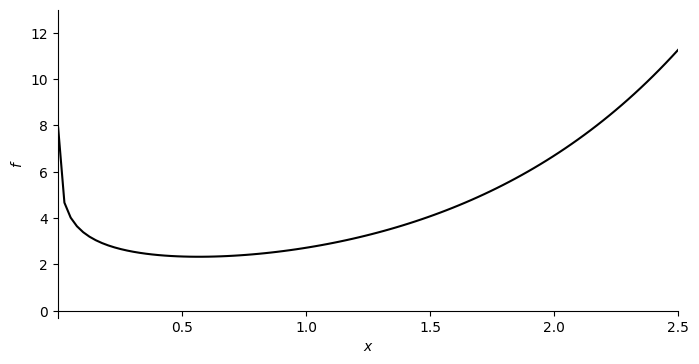

In [5]:
plot_f([0.001, 2.5], [-0.3, 13], f_example_1, 0.0)

Gradient descent can be implemented in the following function:

In [6]:
def gradient_descent(dfdx, x, learning_rate = 0.1, num_iterations = 100):
    for iteration in range(num_iterations):
        x = x - learning_rate * dfdx(x)
    return x

Note that there are three parameters in this implementation: `num_iterations`, `learning_rate`, initial point `x_initial`. Model parameters for such methods as gradient descent are usually found experimentially. For now, just assume that you know the parameters that will work in this model - you will see the discussion of that later. To optimize the function, set up the parameters and call the defined function `gradient_descent`:

In [7]:
num_iterations = 25; learning_rate = 0.1; x_initial = 1.6
print("Gradient descent result: x_min =", gradient_descent(dfdx_example_1, x_initial, learning_rate, num_iterations))

Gradient descent result: x_min = 0.5671434156768685


The code in following cell will help you to visualize and understand the gradient descent method deeper. After the end of the animation, you can click on the plot to choose a new initial point and investigate how the gradient descent method will be performed.

You can see that it works successfully here, bringing it to the global minimum point!

What if some of the parameters will be changed? Will the method always work? Uncomment the lines in the cell below and rerun the code to investigate what happens if other parameter values are chosen. Try to investigate and analyse the results. You can read some comments below.

*Notes related to this animation*:
- Gradient descent is performed with some pauses between the iterations for visualization purposes. The actual implementation is much faster.
- The animation stops when minimum point is reached with certain accuracy (it might be a smaller number of steps than `num_iterations`) - to avoid long runs of the code and for teaching purposes.
- Please wait for the end of the animation before making any code changes or rerunning the cell. In case of any issues, you can try to restart the Kernel and rerun the notebook.

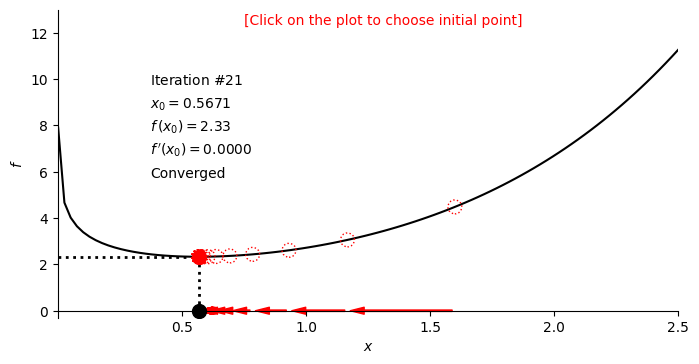

In [8]:
num_iterations = 25; learning_rate = 0.1; x_initial = 1.6
# num_iterations = 25; learning_rate = 0.3; x_initial = 1.6
# num_iterations = 25; learning_rate = 0.5; x_initial = 1.6
# num_iterations = 25; learning_rate = 0.04; x_initial = 1.6
# num_iterations = 75; learning_rate = 0.04; x_initial = 1.6
# num_iterations = 25; learning_rate = 0.1; x_initial = 0.05
# num_iterations = 25; learning_rate = 0.1; x_initial = 0.03
# num_iterations = 25; learning_rate = 0.1; x_initial = 0.02

gd_example_1 = gradient_descent_one_variable([0.001, 2.5], [-0.3, 13], f_example_1, dfdx_example_1,
                                   gradient_descent, num_iterations, learning_rate, x_initial, 0.0, [0.35, 9.5])

Comments related to the choice of the parameters in the animation above:

- Choosing `num_iterations = 25`, `learning_rate = 0.1`, `x_initial = 1.6` you get to the minimum point successfully. Even a little bit earlier - on the iteration 21, so for this choice of the learning rate and initial point, the number of iterations could have been taken less than `25` to save some computation time.

- Increasing the `learning_rate` to `0.3` you can see that the method converges even faster - you need less number of iterations. But note that the steps are larger and this may cause some problems.

- Increasing the `learning_rate` further to `0.5` the method doesn't converge anymore! You steped too far away from the minimum point. So, be careful - increasing `learning_rate` the method may converge significantly faster... or not converge at all.

- To be "safe", you may think, why not to decrease `learning_rate`?! Take it `0.04`, keeping the rest of the parameters the same. The model will not run enough number of iterations to converge!

- Increasing `num_iterations`, say to `75`, the model will converge but slowly. This would be more "expensive" computationally.

- What if you get back to the original parameters `num_iterations = 25`, `learning_rate = 0.1`, but choose some other `x_initial`, e.g. `0.05`? The function is steeper at that point, thus the gradient is larger in absolute value, and the first step is larger. But it will work - you will get to the minimum point.

- If you take `x_initial = 0.03` the function is even steeper, making the first step significantly larger. You are risking "missing" the minimum point.

- Taking `x_initial = 0.02` the method doesn't converge anymore...

This is a very simple example, but hopefully, it gives you an idea of how important is the choice of the initial parameters.

<a name='2'></a>
## 2 - Function with Multiple Minima

Now you can take a slightly more complicated example - a function in one variable, but with multiple minima. Such an example was shown in the videos, and you can plot the function with the following code:

(<Figure size 800x400 with 1 Axes>, <Axes: xlabel='$x$', ylabel='$f$'>)

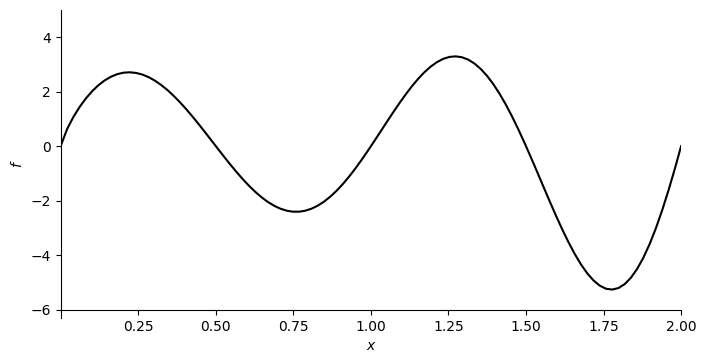

In [9]:
plot_f([0.001, 2], [-6.3, 5], f_example_2, -6)

Function `f_example_2` and its derivative `dfdx_example_2` are pre-defined and uploaded into this notebook. At this stage, while you are mastering the optimization method, do not worry about the corresponding expressions, just concentrate on the gradient descent and the related parameters for now.

Use the following code to run gradient descent with the same `learning_rate` and `num_iterations`, but with a different starting point:

In [10]:
print("Gradient descent results")
print("Global minimum: x_min =", gradient_descent(dfdx_example_2, x=1.3, learning_rate=0.005, num_iterations=35))
print("Local minimum: x_min =", gradient_descent(dfdx_example_2, x=0.25, learning_rate=0.005, num_iterations=35))

Gradient descent results
Global minimum: x_min = 1.7751686214270586
Local minimum: x_min = 0.7585728671820583


The results are different. Both times the point did fall into one of the minima, but in the first run it was a global minimum, while in the second run it got "stuck" in a local one. To see the visualization of what is happening, run the code below. You can uncomment the lines to try different sets of parameters or click on the plot to choose the initial point (after the end of the animation).

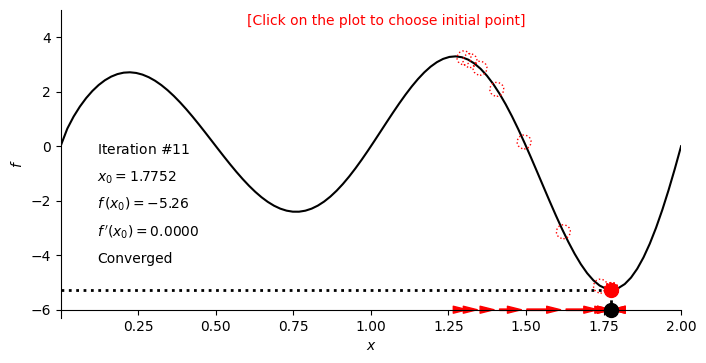

In [12]:
num_iterations = 35; learning_rate = 0.005; x_initial = 1.3
# num_iterations = 35; learning_rate = 0.005; x_initial = 0.25
# num_iterations = 35; learning_rate = 0.01; x_initial = 1.3

gd_example_2 = gradient_descent_one_variable([0.001, 2], [-6.3, 5], f_example_2, dfdx_example_2,
                                      gradient_descent, num_iterations, learning_rate, x_initial, -6, [0.1, -0.5])

You can see that gradient descent method is robust - it allows you to optimize a function with a small number of calculations, but it has some drawbacks. The efficiency of the method depends a lot on the choice of the initial parameters, and it is a challenge in machine learning applications to choose the "right" set of parameters to train the model!